In [1]:
import os
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.special import softmax

# Other

In [2]:
used_subjects = pd.read_csv("/neurospin/dico/data/deep_folding/current/datasets/schiz/used_schiz_subjects.csv")
used_subjects

,participant_id,sex,age,diagnosis,study,site
0,INV07WT2ZL3,0.0,29.0,control,BSNIP,Dallas
1,INV0AL14J6U,0.0,43.0,schizophrenia,BSNIP,Dallas
2,INV14XK7P6E,0.0,30.0,control,BSNIP,Dallas
3,INV1HXNTXYF,1.0,18.0,control,BSNIP,Dallas
4,INV1XCNF4J5,1.0,25.0,control,BSNIP,Dallas
...,...,...,...,...,...,...
1287,ESOC10060,1.0,26.0,control,PRAGUE,PRAGUE
1288,ESOC10019,1.0,28.0,control,PRAGUE,PRAGUE
1289,ESOC10063,0.0,31.0,control,PRAGUE,PRAGUE
1290,ESOC10098,1.0,27.0,control,PRAGUE,PRAGUE


In [3]:
# Studies
studies = ["schizconnect-vip", "bsnip", "cnp", "candi"]
# Data folders
root = os.path.join("/", "neurospin/psy_sbox/analyses/202205_predict_neurodev/data/root")
_root = os.path.join(root, "morphologist")
# Metadata csv
pd_files = "%s_t1mri_skeleton_participants.csv"
metadata_df = pd.concat([pd.read_csv(os.path.join(_root, pd_files % db)) 
                for db in studies], ignore_index=True, sort=False)
# Little hack
metadata_df.loc[metadata_df['session'].isna(), 'session'] = 1
metadata_df.loc[metadata_df['session'].isin(['v1', 'V1']), 'session'] = 1
metadata_df["session"] = metadata_df["session"].astype(int)
# Add set
dico_scheme = pickle.load(open(os.path.join(root, f"train_val_test_test-intra_scz_stratified.pkl"), "rb"))
unique_keys = ["participant_id", "session", "study"]
metadata_df["set"] = None
for split, scheme in dico_scheme.items():
    scheme['session'] = scheme['session'].astype(int)
    source_keys = metadata_df[unique_keys].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
    assert len(set(source_keys)) == len(source_keys), f"Multiple identique identifiers found"
    target_keys = scheme[unique_keys].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
    mask = source_keys.isin(target_keys).values.astype(bool)
    
    metadata_df.loc[mask, "set"] = split

In [4]:
metadata_df = metadata_df[~metadata_df.set.isnull()]
metadata_df['participant_id'] = metadata_df['participant_id'].astype(str)
metadata_df = metadata_df.set_index('participant_id')
metadata_df

,ni_path,session,run,sex,age,diagnosis,study,site,medication,cannabis_last_month,...,stopsignal,T1w,taskswitch,ScannerSerialNumber,ghost_NoGhost,Subject,Hand,YOB,MR Sessions,set
participant_id,,,,,,,,,,,,,,,,,,,,,
NM3356,/neurospin/psy_sbox/analyses/202205_predict_ne...,1,1,0.0,24.0,schizophrenia,SCHIZCONNECT-VIP,WUSTL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,validation
CH8095a,/neurospin/psy_sbox/analyses/202205_predict_ne...,1,1,1.0,30.0,control,SCHIZCONNECT-VIP,NU,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train
CH7131b,/neurospin/psy_sbox/analyses/202205_predict_ne...,1,1,1.0,40.0,control,SCHIZCONNECT-VIP,NU,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test_intra
NM1023,/neurospin/psy_sbox/analyses/202205_predict_ne...,1,1,0.0,23.0,schizophrenia,SCHIZCONNECT-VIP,WUSTL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train
CC8726,/neurospin/psy_sbox/analyses/202205_predict_ne...,1,1,1.0,22.0,control,SCHIZCONNECT-VIP,WUSTL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SS099,/neurospin/psy_sbox/analyses/202205_predict_ne...,1,1,0.0,0.0,schizophrenia,CANDI,CANDI,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,SS_099,R,NaN,1.0,train
HC012,/neurospin/psy_sbox/analyses/202205_predict_ne...,1,1,1.0,0.0,control,CANDI,CANDI,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,HC_012,R,NaN,1.0,validation
HC010,/neurospin/psy_sbox/analyses/202205_predict_ne...,1,1,0.0,0.0,control,CANDI,CANDI,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,HC_010,R,NaN,1.0,validation


In [5]:
used_subjects = used_subjects.set_index('participant_id')
used_subjects['set'] = metadata_df['set']
used_subjects = used_subjects[~used_subjects.set.isnull()]
used_subjects
# 10 subjects missing

,sex,age,diagnosis,study,site,set
participant_id,,,,,,
INV07WT2ZL3,0.0,29.0,control,BSNIP,Dallas,train
INV0AL14J6U,0.0,43.0,schizophrenia,BSNIP,Dallas,train
INV14XK7P6E,0.0,30.0,control,BSNIP,Dallas,train
INV1HXNTXYF,1.0,18.0,control,BSNIP,Dallas,train
INV1XCNF4J5,1.0,25.0,control,BSNIP,Dallas,train
...,...,...,...,...,...,...
ESOC10060,1.0,26.0,control,PRAGUE,PRAGUE,train
ESOC10019,1.0,28.0,control,PRAGUE,PRAGUE,train
ESOC10063,0.0,31.0,control,PRAGUE,PRAGUE,train


In [6]:
metadata_df.loc['ESOC10060',]

ni_path        /neurospin/psy_sbox/analyses/202205_predict_ne...
session                                                        1
run                                                            1
sex                                                          1.0
age                                                         26.0
                                     ...                        
Subject                                                      NaN
Hand                                                         NaN
YOB                                                          NaN
MR Sessions                                                  NaN
set                                                        train
Name: ESOC10060, Length: 71, dtype: object

In [7]:
used_subjects.loc['ESOC10060',]

sex              1.0
age             26.0
diagnosis    control
study         PRAGUE
site          PRAGUE
set            train
Name: ESOC10060, dtype: object

# Output visualisation

## Ok model

In [28]:
used_subjects = pd.read_csv("/neurospin/dico/data/deep_folding/current/datasets/schiz/used_schiz_subjects.csv")
used_subjects.participant_id = used_subjects.participant_id.astype(str)
used_subjects

,participant_id,sex,age,diagnosis,study,site
0,INV07WT2ZL3,0.0,29.0,control,BSNIP,Dallas
1,INV0AL14J6U,0.0,43.0,schizophrenia,BSNIP,Dallas
2,INV14XK7P6E,0.0,30.0,control,BSNIP,Dallas
3,INV1HXNTXYF,1.0,18.0,control,BSNIP,Dallas
4,INV1XCNF4J5,1.0,25.0,control,BSNIP,Dallas
...,...,...,...,...,...,...
1287,ESOC10060,1.0,26.0,control,PRAGUE,PRAGUE
1288,ESOC10019,1.0,28.0,control,PRAGUE,PRAGUE
1289,ESOC10063,0.0,31.0,control,PRAGUE,PRAGUE
1290,ESOC10098,1.0,27.0,control,PRAGUE,PRAGUE


In [29]:
train_outputs = pd.read_csv('/neurospin/dico/agaudin/Runs/09_new_repo/Output/supervised/schiz/both/15-44-37_2/cing_schiz_outputs/train_outputs.csv')
val_outputs = pd.read_csv('/neurospin/dico/agaudin/Runs/09_new_repo/Output/supervised/schiz/both/15-44-37_2/cing_schiz_outputs/val_outputs.csv')
test_outputs = pd.read_csv('/neurospin/dico/agaudin/Runs/09_new_repo/Output/supervised/schiz/both/15-44-37_2/cing_schiz_outputs/test_outputs.csv')
test_intra_outputs = pd.read_csv('/neurospin/dico/agaudin/Runs/09_new_repo/Output/supervised/schiz/both/15-44-37_2/cing_schiz_outputs/test_intra_outputs.csv')

In [30]:
def get_sites(df, used_subjects):
    partial_subjects = used_subjects[used_subjects.participant_id.isin(df.participant_id)]
    partial_subjects = partial_subjects.sort_values(by='participant_id')
    df.sort_values(by='participant_id', inplace=True)
    df['site'] = partial_subjects['site'].values
    return df

In [31]:
train_outputs = train_outputs.rename(columns={'ID': 'participant_id'})
train_outputs = get_sites(train_outputs, used_subjects)
train_outputs

,participant_id,labels,dim1,dim2,site
0,10171,0,0.882429,-0.470047,CNP
1,10189,0,0.559918,-0.481361,CNP
2,10193,0,1.260131,-0.600974,CNP
3,10206,0,1.066331,-0.529282,CNP
4,10225,0,1.088941,-0.552744,CNP
...,...,...,...,...,...
923,st110288,1,0.426142,-0.224318,vip
924,va110289,0,0.699114,-0.414876,vip
925,ye110322,1,1.098404,-0.679528,vip
926,yh100442,0,1.231017,-0.627339,vip


In [32]:
val_outputs = val_outputs.rename(columns={'ID': 'participant_id'})
val_outputs = get_sites(val_outputs, used_subjects)

test_outputs = test_outputs.rename(columns={'ID': 'participant_id'})
test_outputs = get_sites(test_outputs, used_subjects)

test_intra_outputs = test_intra_outputs.rename(columns={'ID': 'participant_id'})
test_intra_outputs = get_sites(test_intra_outputs, used_subjects)

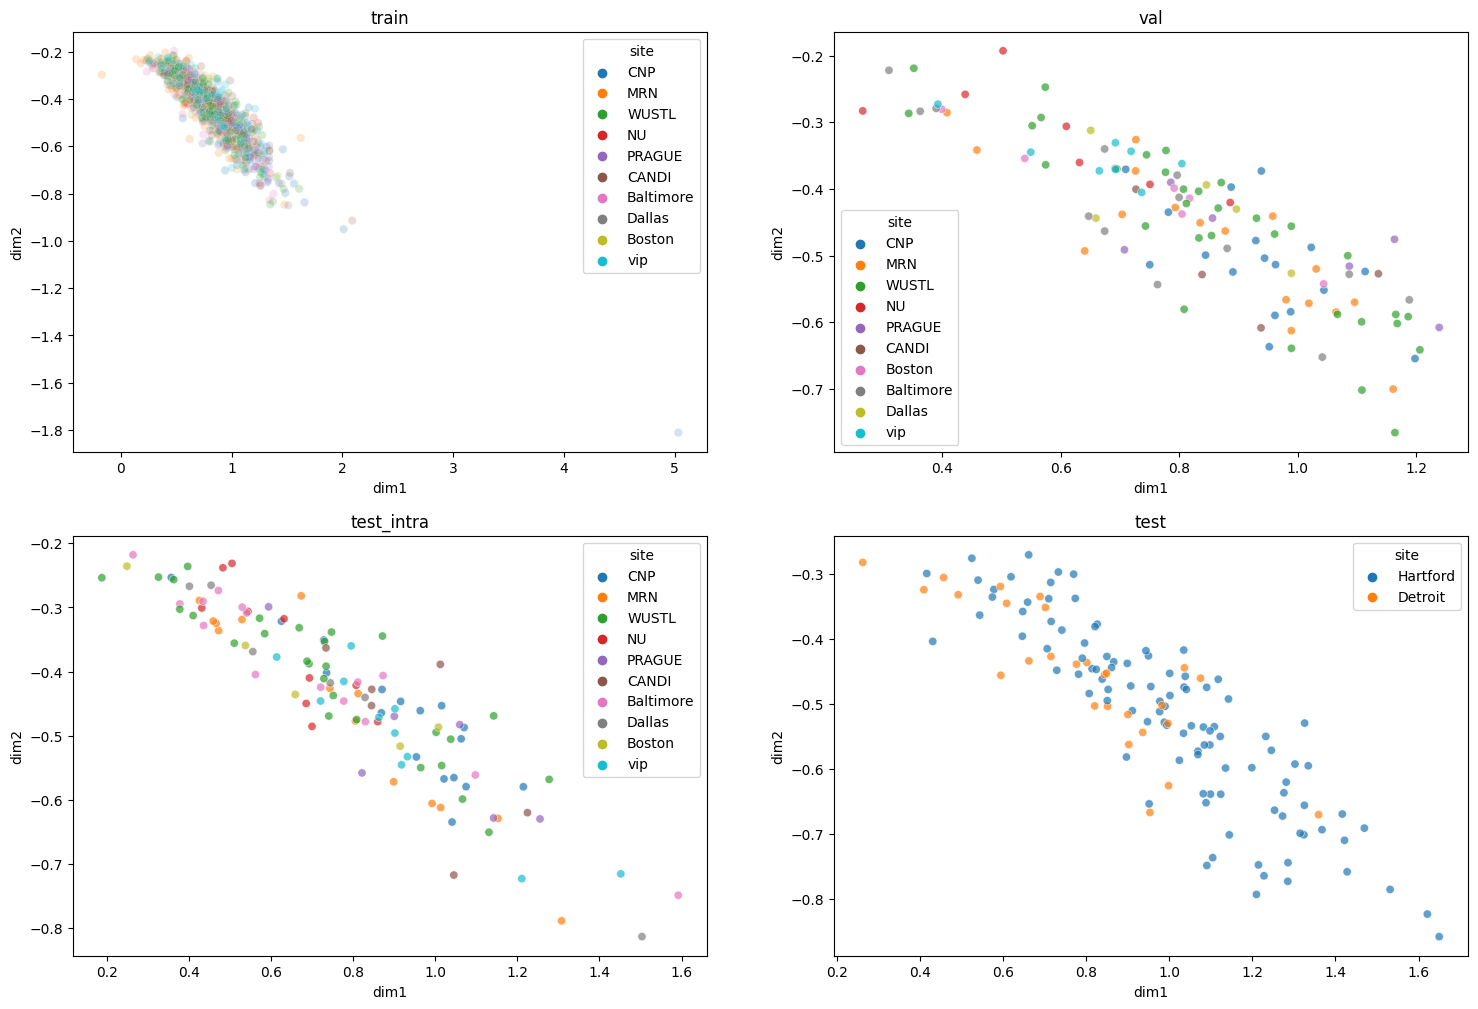

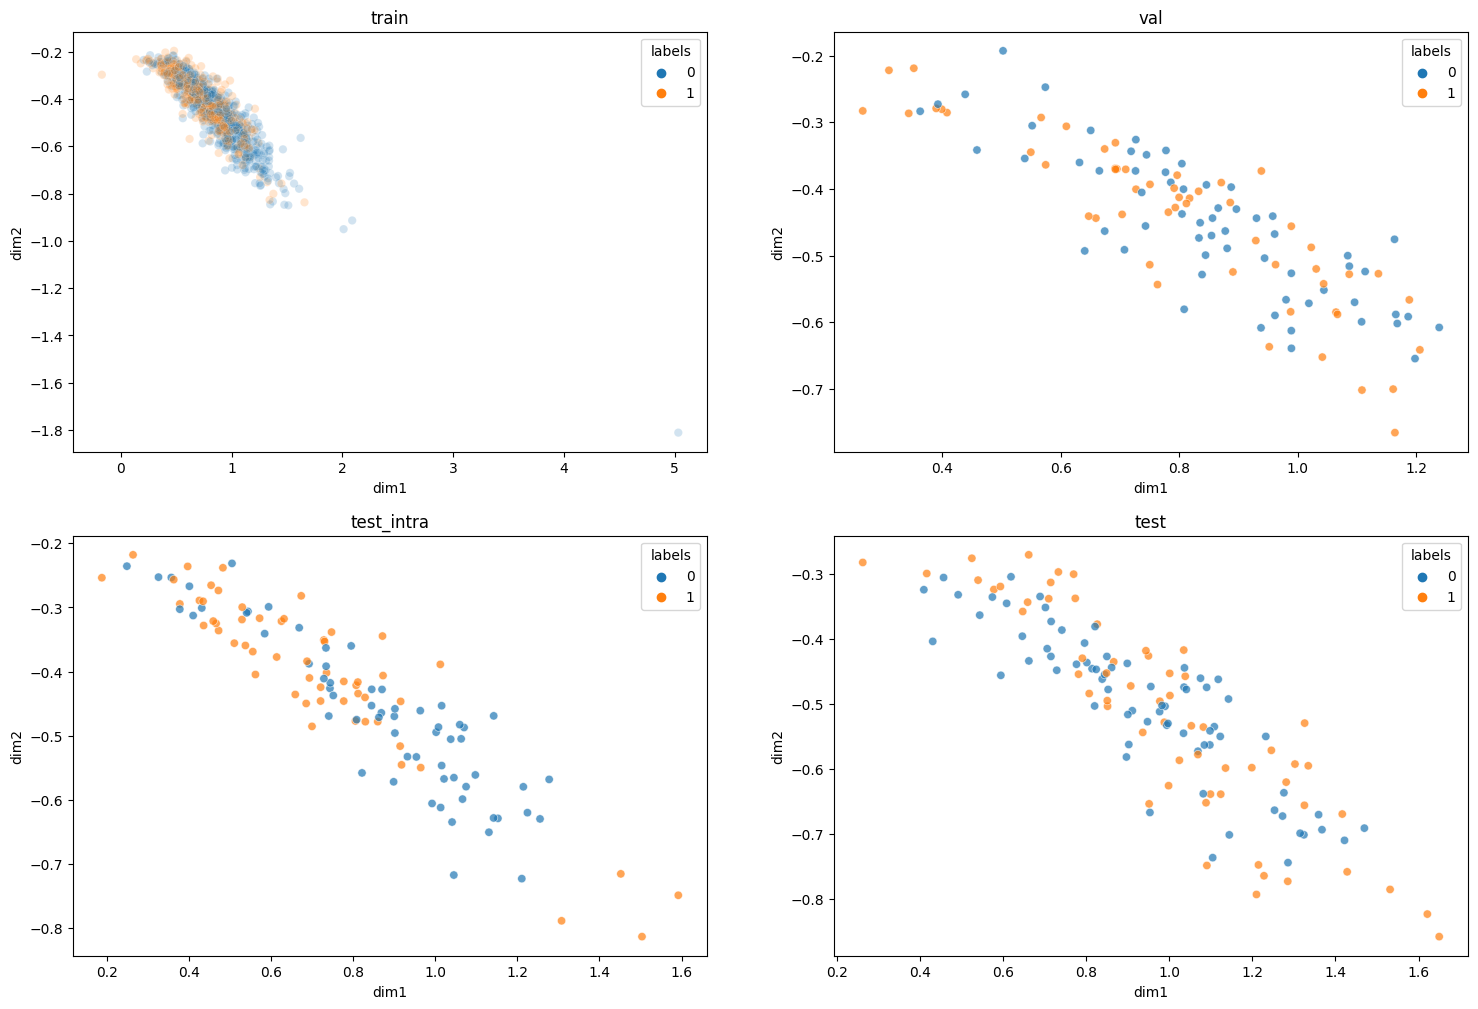

In [33]:
plt.figure(figsize=(18,12))

plt.subplot(221)
sns.scatterplot(train_outputs, x='dim1', y ='dim2', hue='site', alpha=0.2)

plt.title('train')

plt.subplot(222)
sns.scatterplot(val_outputs, x='dim1', y ='dim2', hue='site', alpha=0.7)
plt.title("val")

plt.subplot(223)
sns.scatterplot(test_intra_outputs, x='dim1', y ='dim2', hue='site', alpha=0.7)
plt.title('test_intra')

plt.subplot(224)
sns.scatterplot(test_outputs, x='dim1', y ='dim2', hue='site', alpha=0.7)
plt.title("test")

plt.show()

plt.figure(figsize=(18,12))

plt.subplot(221)
sns.scatterplot(train_outputs, x='dim1', y ='dim2', hue='labels', alpha=0.2)

plt.title('train')

plt.subplot(222)
sns.scatterplot(val_outputs, x='dim1', y ='dim2', hue='labels', alpha=0.7)
plt.title("val")

plt.subplot(223)
sns.scatterplot(test_intra_outputs, x='dim1', y ='dim2', hue='labels', alpha=0.7)
plt.title('test_intra')

plt.subplot(224)
sns.scatterplot(test_outputs, x='dim1', y ='dim2', hue='labels', alpha=0.7)
plt.title("test")

plt.show()

In [34]:
def get_softmax(df):
    X = df[['dim1', 'dim2']].values
    return softmax(X, axis=1)

def add_softmax(df):
    soft = get_softmax(df)
    soft1 = soft[:,0]
    soft2 = soft[:,1]
    df['soft1'] = soft1
    df['soft2'] = soft2

    return df

train_outputs = add_softmax(train_outputs)
val_outputs = add_softmax(val_outputs)
test_intra_outputs = add_softmax(test_intra_outputs)
test_outputs = add_softmax(test_outputs)

train_outputs

,participant_id,labels,dim1,dim2,site,soft1,soft2
0,10171,0,0.882429,-0.470047,CNP,0.794534,0.205466
1,10189,0,0.559918,-0.481361,CNP,0.739097,0.260903
2,10193,0,1.260131,-0.600974,CNP,0.865426,0.134574
3,10206,0,1.066331,-0.529282,CNP,0.831404,0.168596
4,10225,0,1.088941,-0.552744,CNP,0.837764,0.162236
...,...,...,...,...,...,...,...
923,st110288,1,0.426142,-0.224318,vip,0.657114,0.342886
924,va110289,0,0.699114,-0.414876,vip,0.752872,0.247128
925,ye110322,1,1.098404,-0.679528,vip,0.855441,0.144559
926,yh100442,0,1.231017,-0.627339,vip,0.865105,0.134895


#### Plot softmax values

In [35]:
def plot_soft(df, hue='site'):
    sns.stripplot(df, x='soft2', y=hue, hue='labels', alpha=0.5)
    plt.axvline(x=[0.5], color='black')

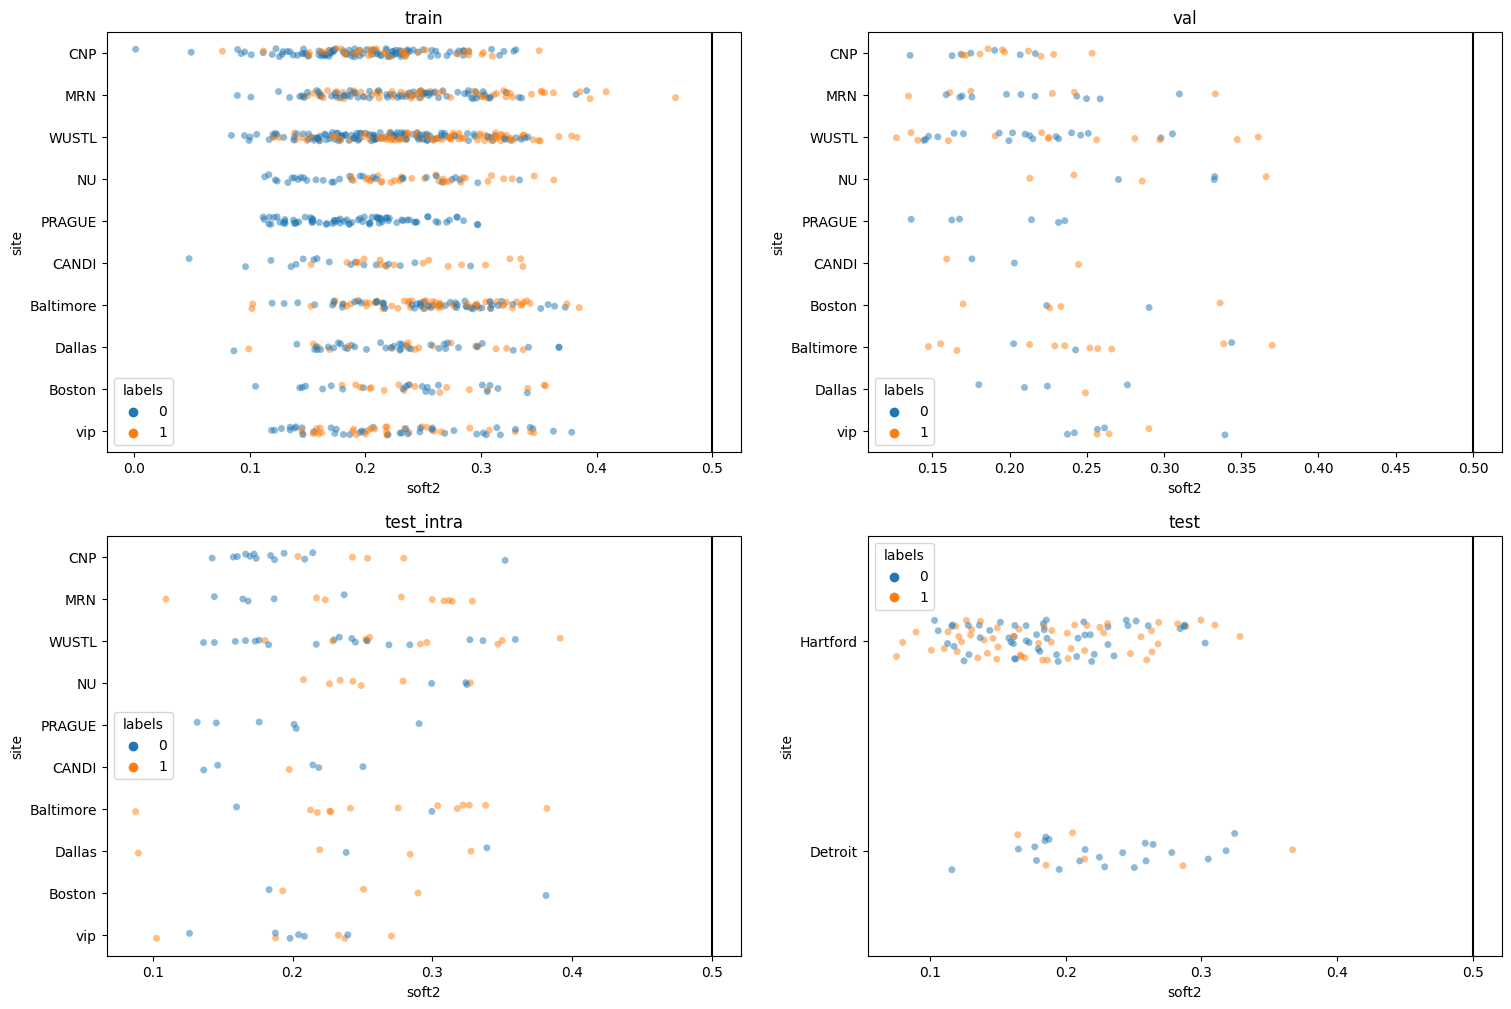

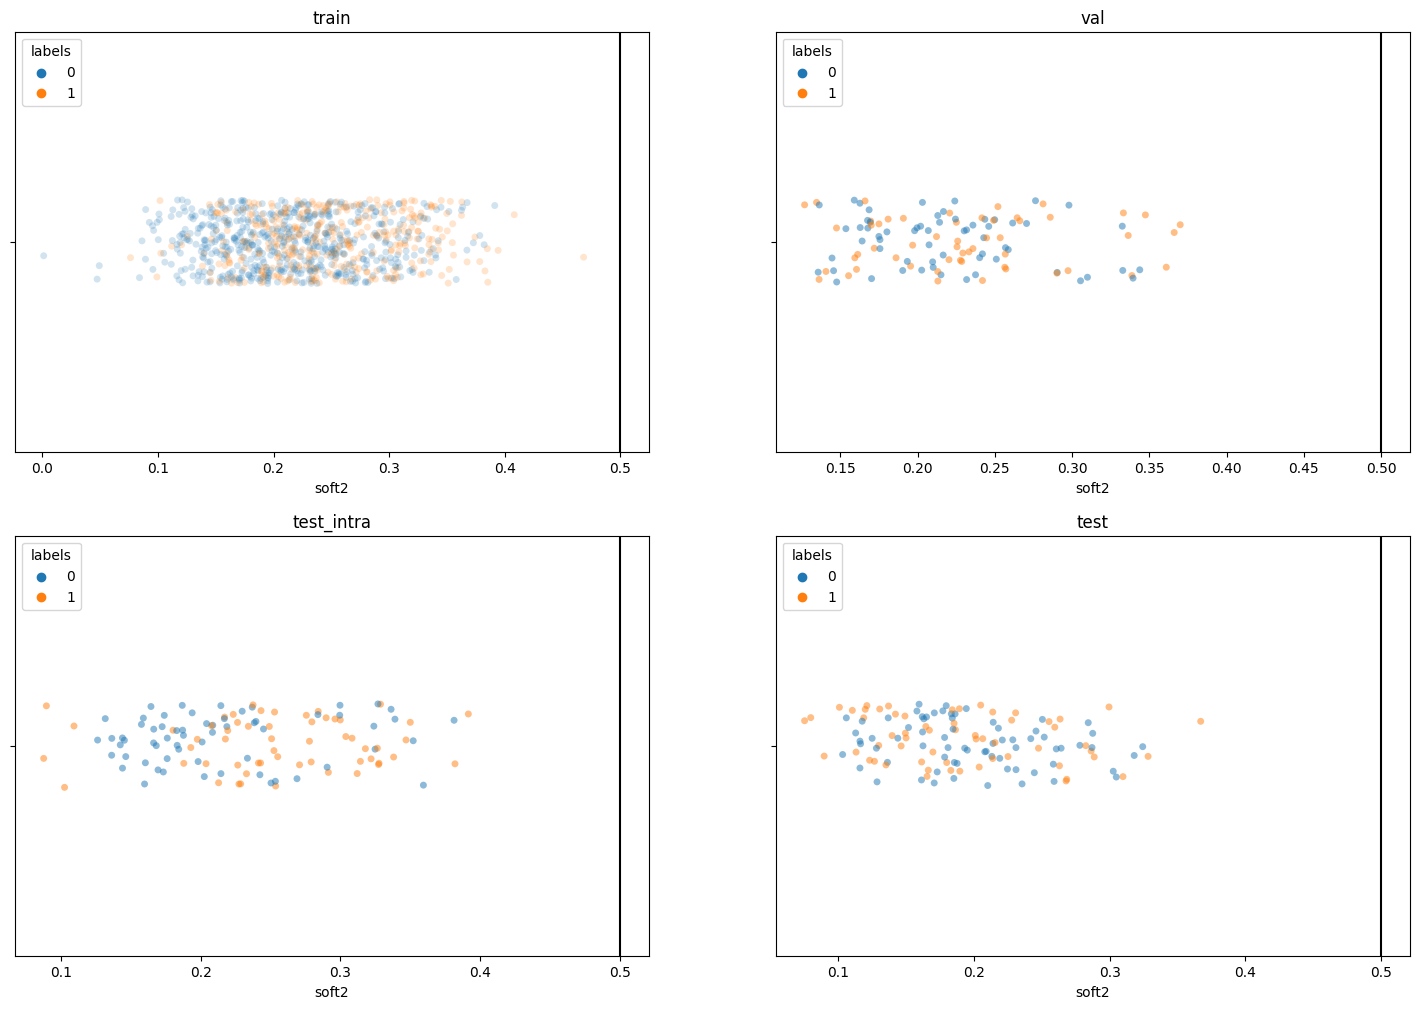

In [36]:
plt.figure(figsize=(18,12))

plt.subplot(221)
plot_soft(train_outputs)
plt.title('train')

plt.subplot(222)
plot_soft(val_outputs)
plt.title("val")

plt.subplot(223)
plot_soft(test_intra_outputs)
plt.title('test_intra')

plt.subplot(224)
plot_soft(test_outputs)
plt.title("test")

plt.show()


plt.figure(figsize=(18,12))

plt.subplot(221)
sns.stripplot(train_outputs, x='soft2', hue='labels', alpha=0.2)
plt.axvline(x=[0.5], color='black')
plt.title('train')

plt.subplot(222)
sns.stripplot(val_outputs, x='soft2', hue='labels', alpha=0.5)
plt.axvline(x=[0.5], color='black')
plt.title("val")

plt.subplot(223)
sns.stripplot(test_intra_outputs, x='soft2', hue='labels', alpha=0.5)
plt.axvline(x=[0.5], color='black')
plt.title('test_intra')

plt.subplot(224)
sns.stripplot(test_outputs, x='soft2', hue='labels', alpha=0.5)
plt.axvline(x=[0.5], color='black')
plt.title("test")

plt.show()

## Overfitting model

In [18]:
used_subjects = pd.read_csv("/neurospin/dico/data/deep_folding/current/datasets/schiz/used_schiz_subjects.csv")
used_subjects.participant_id = used_subjects.participant_id.astype(str)
used_subjects

,participant_id,sex,age,diagnosis,study,site
0,INV07WT2ZL3,0.0,29.0,control,BSNIP,Dallas
1,INV0AL14J6U,0.0,43.0,schizophrenia,BSNIP,Dallas
2,INV14XK7P6E,0.0,30.0,control,BSNIP,Dallas
3,INV1HXNTXYF,1.0,18.0,control,BSNIP,Dallas
4,INV1XCNF4J5,1.0,25.0,control,BSNIP,Dallas
...,...,...,...,...,...,...
1287,ESOC10060,1.0,26.0,control,PRAGUE,PRAGUE
1288,ESOC10019,1.0,28.0,control,PRAGUE,PRAGUE
1289,ESOC10063,0.0,31.0,control,PRAGUE,PRAGUE
1290,ESOC10098,1.0,27.0,control,PRAGUE,PRAGUE


In [19]:
def get_sites(df, used_subjects):
    partial_subjects = used_subjects[used_subjects.participant_id.isin(df.participant_id)]
    partial_subjects = partial_subjects.sort_values(by='participant_id')
    df.sort_values(by='participant_id', inplace=True)
    df['site'] = partial_subjects['site'].values
    return df

In [20]:
# load and preprocess stuff
used_subjects = pd.read_csv("/neurospin/dico/data/deep_folding/current/datasets/schiz/used_schiz_subjects.csv")
used_subjects.participant_id = used_subjects.participant_id.astype(str)

load_path = '/neurospin/dico/agaudin/Runs/09_new_repo/Output/supervised/schiz/both/11-19-53_1/cing_schiz_outputs'

train_outputs = pd.read_csv(load_path + '/train_outputs.csv')
val_outputs = pd.read_csv(load_path + '/val_outputs.csv')
test_outputs = pd.read_csv(load_path + '/test_outputs.csv')
test_intra_outputs = pd.read_csv(load_path + '/test_intra_outputs.csv')

train_outputs = train_outputs.rename(columns={'ID': 'participant_id'})
train_outputs = get_sites(train_outputs, used_subjects)

val_outputs = val_outputs.rename(columns={'ID': 'participant_id'})
val_outputs = get_sites(val_outputs, used_subjects)

test_outputs = test_outputs.rename(columns={'ID': 'participant_id'})
test_outputs = get_sites(test_outputs, used_subjects)

test_intra_outputs = test_intra_outputs.rename(columns={'ID': 'participant_id'})
test_intra_outputs = get_sites(test_intra_outputs, used_subjects)

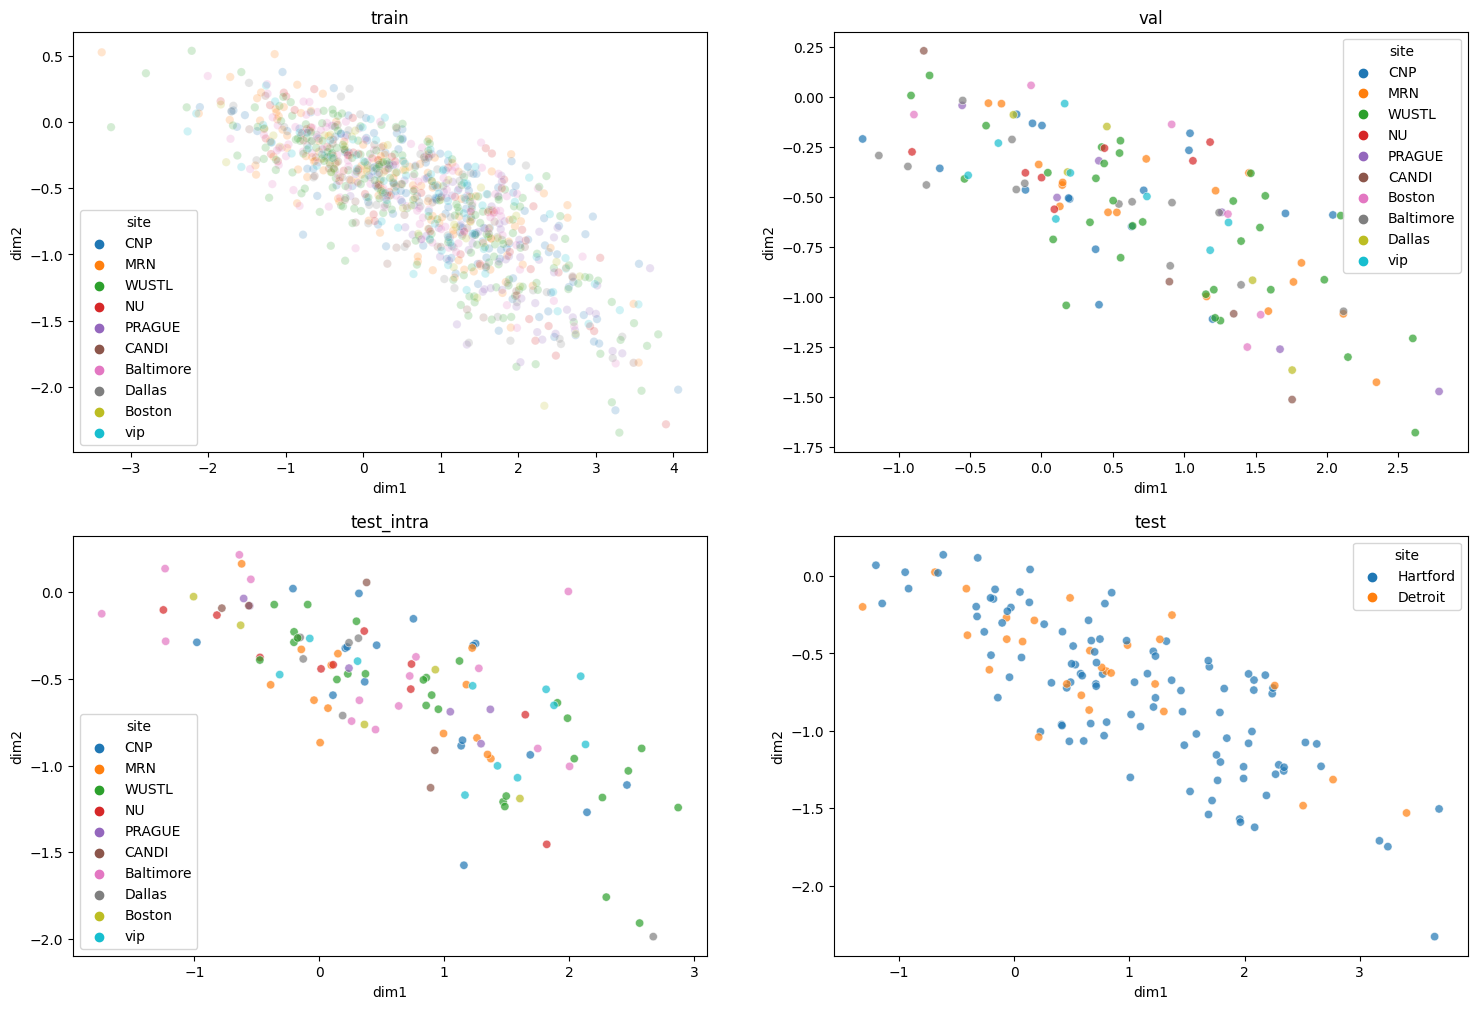

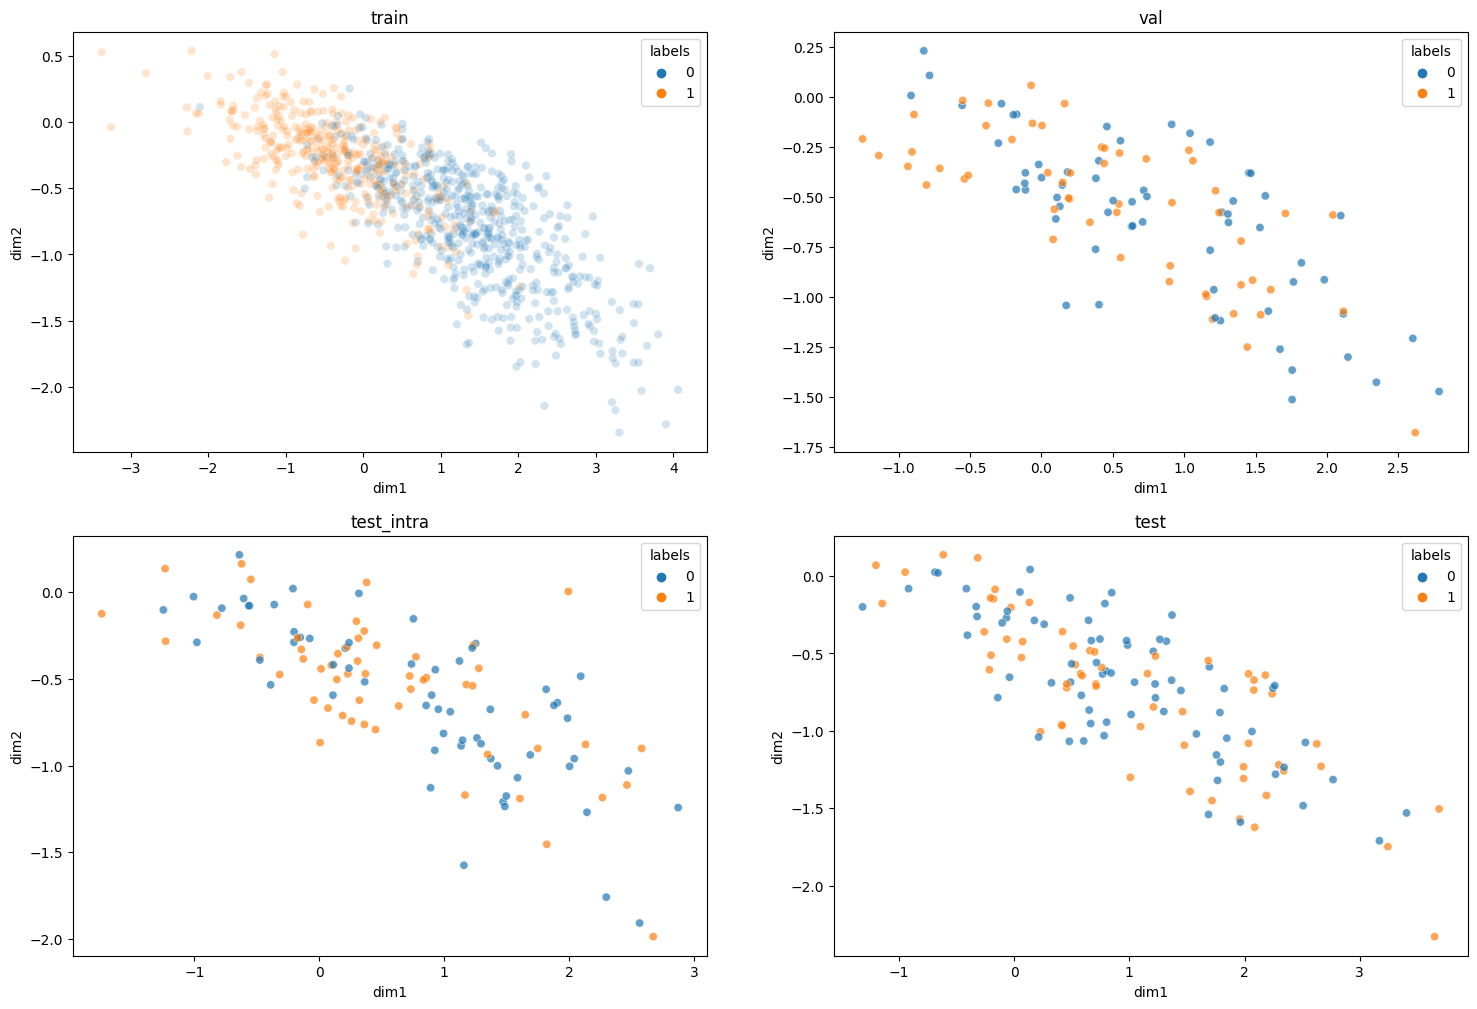

In [21]:
# les sorties

plt.figure(figsize=(18,12))

plt.subplot(221)
sns.scatterplot(train_outputs, x='dim1', y ='dim2', hue='site', alpha=0.2)

plt.title('train')

plt.subplot(222)
sns.scatterplot(val_outputs, x='dim1', y ='dim2', hue='site', alpha=0.7)
plt.title("val")

plt.subplot(223)
sns.scatterplot(test_intra_outputs, x='dim1', y ='dim2', hue='site', alpha=0.7)
plt.title('test_intra')

plt.subplot(224)
sns.scatterplot(test_outputs, x='dim1', y ='dim2', hue='site', alpha=0.7)
plt.title("test")

plt.show()

plt.figure(figsize=(18,12))

plt.subplot(221)
sns.scatterplot(train_outputs, x='dim1', y ='dim2', hue='labels', alpha=0.2)

plt.title('train')

plt.subplot(222)
sns.scatterplot(val_outputs, x='dim1', y ='dim2', hue='labels', alpha=0.7)
plt.title("val")

plt.subplot(223)
sns.scatterplot(test_intra_outputs, x='dim1', y ='dim2', hue='labels', alpha=0.7)
plt.title('test_intra')

plt.subplot(224)
sns.scatterplot(test_outputs, x='dim1', y ='dim2', hue='labels', alpha=0.7)
plt.title("test")

plt.show()

  participant_id  labels      dim1      dim2 site     soft1     soft2
0          10171       0 -0.575563 -0.125954  CNP  0.389454  0.610546
1          10189       0  1.747598 -1.576106  CNP  0.965233  0.034767
2          10193       0  1.554048 -0.800412  CNP  0.913288  0.086712
3          10206       0  0.937587 -0.581430  CNP  0.820394  0.179606
4          10225       0  1.192566 -1.144736  CNP  0.911920  0.088080


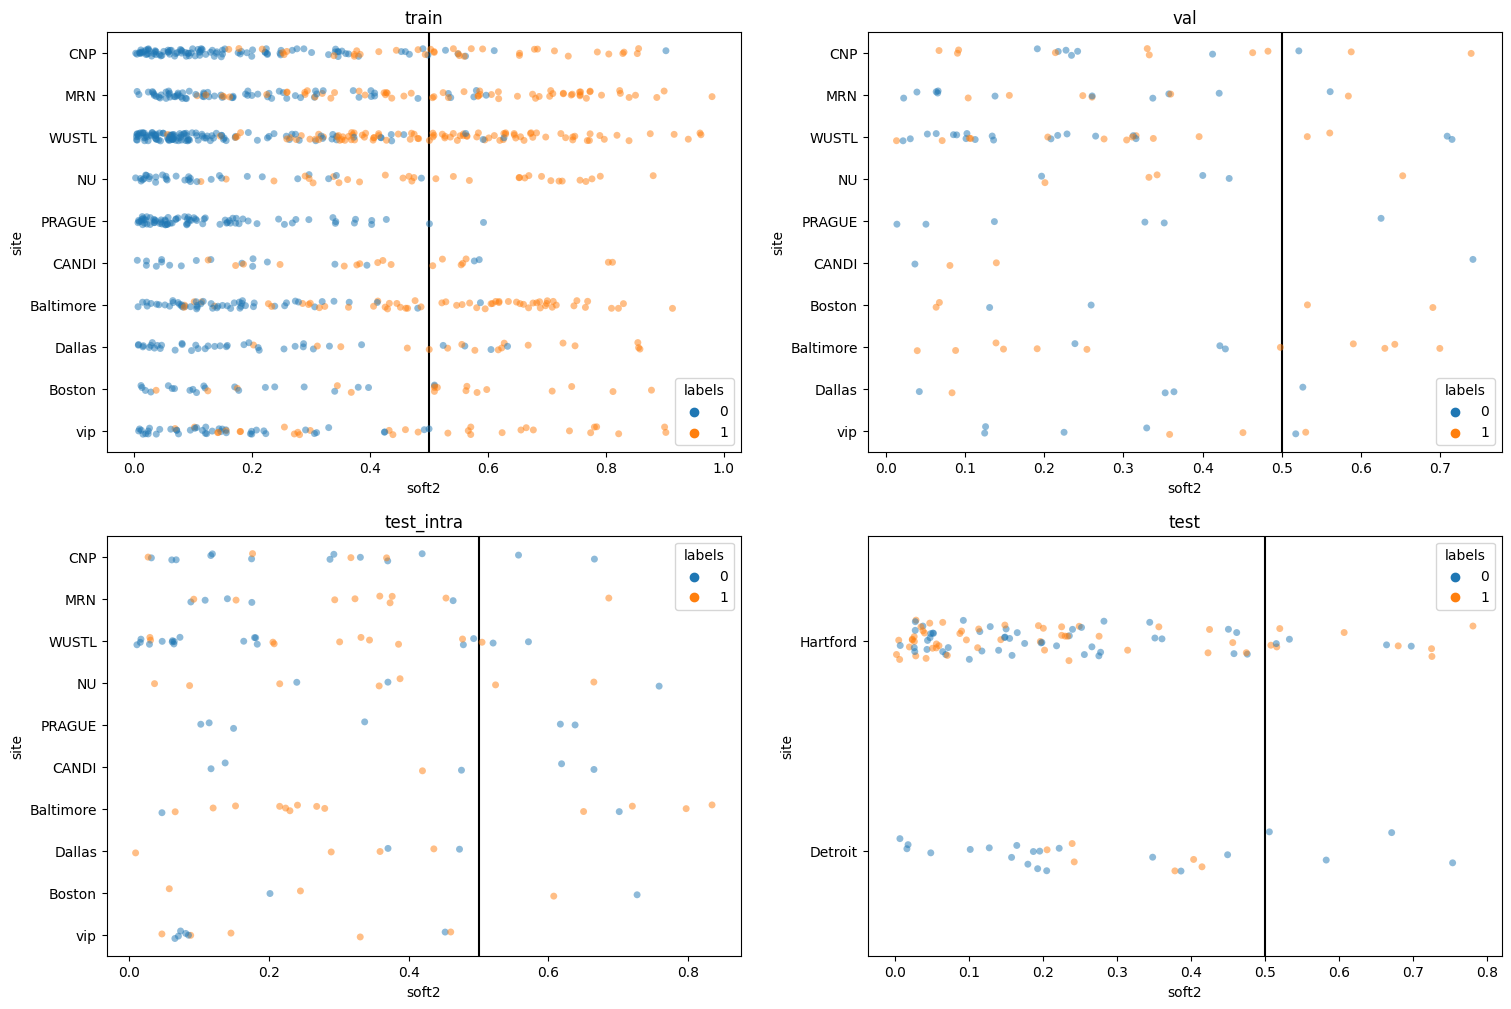

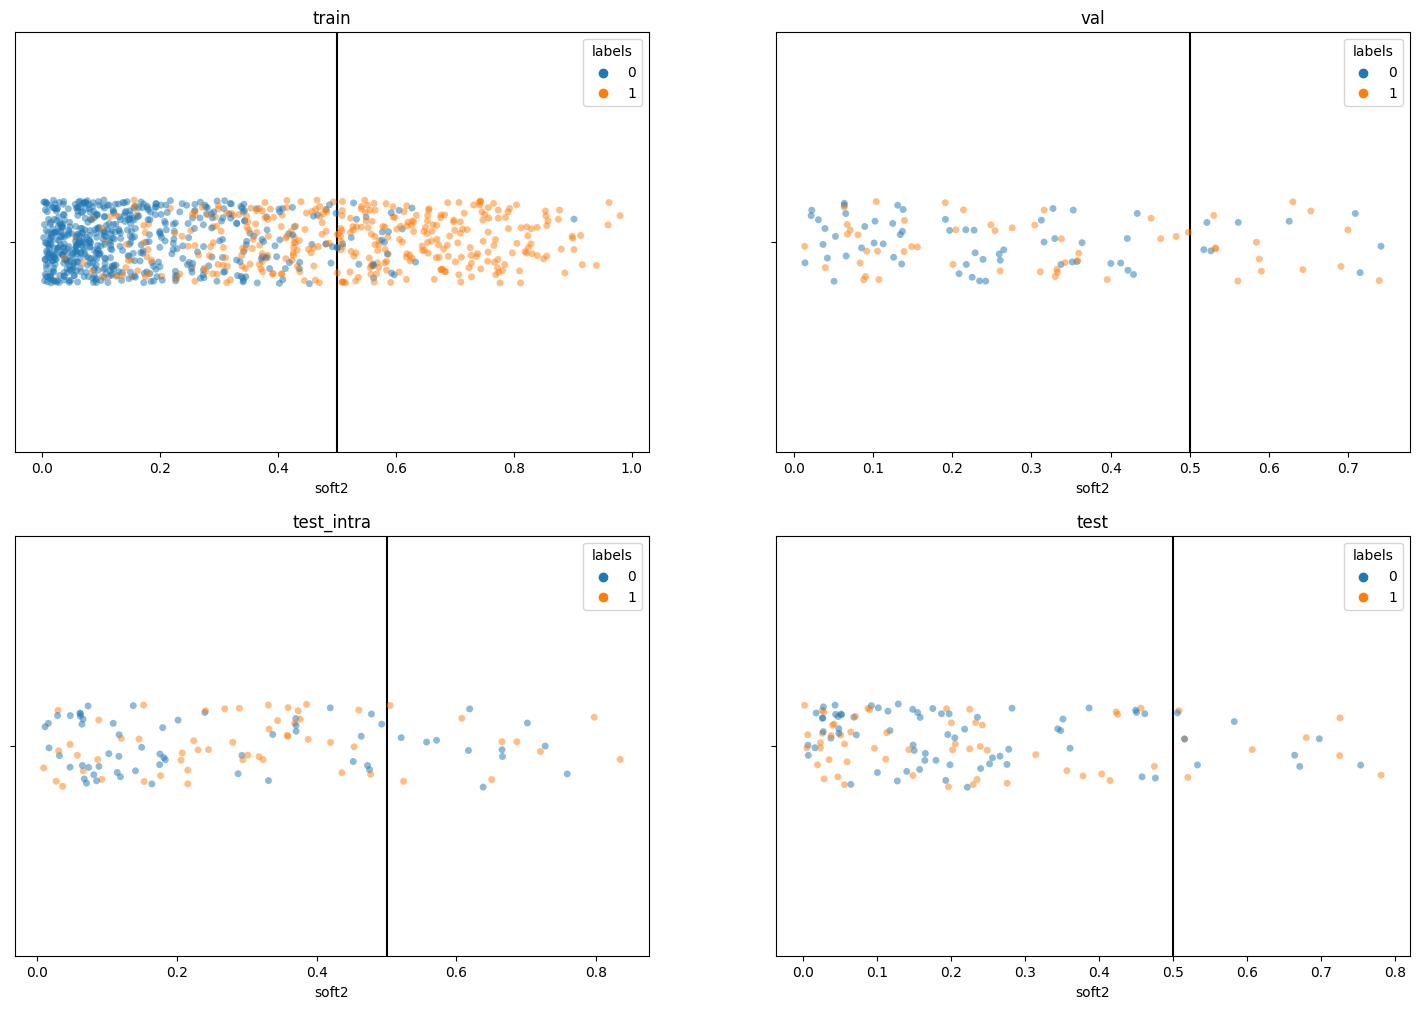

In [23]:
# les probas de classe 1
train_outputs = add_softmax(train_outputs)
val_outputs = add_softmax(val_outputs)
test_intra_outputs = add_softmax(test_intra_outputs)
test_outputs = add_softmax(test_outputs)

print(train_outputs.head())


def plot_soft(df, hue='site'):
    sns.stripplot(df, x='soft2', y=hue, hue='labels', alpha=0.5)
    plt.axvline(x=[0.5], color='black')

plt.figure(figsize=(18,12))

plt.subplot(221)
plot_soft(train_outputs)
plt.title('train')

plt.subplot(222)
plot_soft(val_outputs)
plt.title("val")

plt.subplot(223)
plot_soft(test_intra_outputs)
plt.title('test_intra')

plt.subplot(224)
plot_soft(test_outputs)
plt.title("test")

plt.show()


plt.figure(figsize=(18,12))

plt.subplot(221)
sns.stripplot(train_outputs, x='soft2', hue='labels', alpha=0.5)
plt.axvline(x=[0.5], color='black')
plt.title('train')

plt.subplot(222)
sns.stripplot(val_outputs, x='soft2', hue='labels', alpha=0.5)
plt.axvline(x=[0.5], color='black')
plt.title("val")

plt.subplot(223)
sns.stripplot(test_intra_outputs, x='soft2', hue='labels', alpha=0.5)
plt.axvline(x=[0.5], color='black')
plt.title('test_intra')

plt.subplot(224)
sns.stripplot(test_outputs, x='soft2', hue='labels', alpha=0.5)
plt.axvline(x=[0.5], color='black')
plt.title("test")

plt.show()

In [27]:
from sklearn.metrics import roc_auc_score

roc_auc_score(train_outputs.labels, train_outputs.soft2) 

0.9171749676978961